In [1]:
#my implementation of the string method

In [9]:
%pylab inline
import numpy as np
from msmbuilder.example_datasets import MullerPotential
from scipy import interpolate
from scipy import spatial
from msmbuilder.example_datasets._muller import propagate,

Populating the interactive namespace from numpy and matplotlib


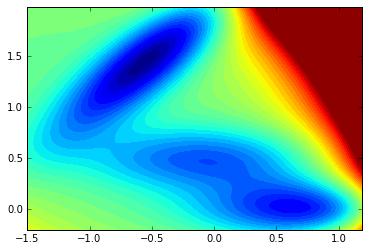

In [10]:
mp = MullerPotential()
mp.plot()

In [ ]:
from 

In [11]:
def string_method(dim_wanted,start,end,N,MaxIter,interp_type,lxyt=None,starting_string=None):
     #dimensionality
     d = np.shape(start)[0]
     #timestep
     dt = 0.0001

     #equally space points to re-orient string
     alpha_eq = np.linspace(0,1,N)
     #actual string
     string = np.zeros((N,d))
     #start and end points
     string[0,:] = start
     string[-1,:] = end
     #forces
     F = np.zeros(np.shape(start))
     alpha = np.zeros((N,1))
     nstep2 = 0
     #finite temperate parameters
     string_h = dt #temperature attenuation
     mu = 9 ##temperature
     #string smoothing coefficient
     kap = 0.1
     #timestep for string update
     ha = 0.1

     r1 = np.ones((N,2));
     r1[0,:] = 0;
     r1[-1,:] = 0;

     if lxyt == None:
          #start by linearly interpolating
          f = interpolate.interp1d([0,1], [start,end],kind=interp_type ,axis=0)
          force_obj = muller_force()
          string = f(alpha_eq)
          initial_string  = np.copy(string)

          string_av = np.copy(string)
       
          kdtree = spatial.kdtree.KDTree(string)
          pp.scatter(string[:,0],string[:,1],color='white')
          pp.scatter(string[:,0],string[:,1],color='white')
     else:
          f = interpolate.interp1d(lxyt, starting_string,kind=interp_type ,axis=0)
          force_obj = muller_force()
          string = f(alpha_eq)
          initial_string  = np.copy(string)

          string_av = np.copy(string)
          ##get the triangluation of each initial string.can use triangulation but i think kdtree
          #should work too.
          kdtree = spatial.kdtree.KDTree(initial_string)


     for i in np.arange(MaxIter):
         #doing the force updaes to get new energy minimal but adding a small \
         #noise term
          string_copy = np.copy(string)
          for j in np.arange(N):
               f = force_obj(string[j,:])
               string[j,:] = string[j,:] + dt*f + np.sqrt(2*string_h*mu)\
               *np.random.normal(loc=0.0,scale=1.0,size=(1,d))
          #print string
          #putting the string back to where it belongs.
          #figure out if the point has moved away from where it started from\
          # using a kdtree for this

          distances,vertex_indices = kdtree.query(string)
          neighbor_based_update =  vertex_indices == np.arange(N)
          vertex_indices_copy = vertex_indices
          #either keep the string if in the same region or move it to an new region
          for i,image in enumerate(string):
               dis_mat = np.zeros(N)
               for j,original in enumerate(initial_string):
                    dis_mat[j] = np.linalg.norm(original - image)
               vertex_indices_copy[i] = np.argmin(dis_mat)
          string[:,0] = string[:,0]*neighbor_based_update +\
           string_copy[:,0]*(1-neighbor_based_update)
          string[:,1] = string[:,1]*neighbor_based_update +\
           string_copy[:,1]*(1-neighbor_based_update)
          ##getting the new rolling averages
          string_av = (string_av*(i+nstep2)+string)/(i+nstep2+1)

          ## get shift in towards the middle
          #print np.roll(initial_string,-1,axis=0)

          string_shift = np.roll(initial_string,-1,axis=0) + np.roll(initial_string,1,axis=0)\
          - 2*initial_string
          #move initial string towards the average
          #print string_shift
          initial_string = initial_string -(initial_string-string_av)*ha
          +kap*ha*N*r1*string_shift
          #print string_shift
          #get the dx

          string_shift = initial_string - np.roll(initial_string,1,axis=0)
          string_shift[0,:] = 0

          #we need to associate every point on the string with number
          lxyt = np.cumsum(np.sqrt(string_shift[:,0] * string_shift[:,0]\
          + string_shift[:,1] * string_shift[:,1]))
          #normalize the number
          lxyt = lxyt/lxyt[-1]
          #set up a function to take in lxyt
          my_func =  interpolate.interp1d(lxyt,initial_string,kind='linear',axis=0)
          #extrapolate equally spaced points to get the initial string.
          initial_string = my_func(alpha_eq)

          kdtree = spatial.kdtree.KDTree(initial_string)
          distances,vertex_indices = kdtree.query(string)
          neighbor_based_update =  vertex_indices == np.arange(N)
          #either keep the string if in the same region or move it to an new region
          string[:,0] = string[:,0]*neighbor_based_update +\
           initial_string[:,0]*(1-neighbor_based_update)
          string[:,1] = string[:,1]*neighbor_based_update +\
           initial_string[:,1]*(1-neighbor_based_update)

In [12]:
start_point = [-1,0.5]
end_point = [0.7,0.6]

lxyt,string = string_method(2,[-1,0.5],[0.7,0.6],5,30,"linear")

NameError: name 'muller_force' is not defined